# Wordcloud
<br>  

### References
- [jqassistant](https://jqassistant.org)
- [py2neo](https://py2neo.org/2021.1/)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import typing as typ
from neo4j import GraphDatabase
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.

driver = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))
driver.verify_connectivity()

In [3]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [4]:
def query_cypher_to_data_frame(filename: str, parameters_: typ.Optional[typ.Dict[str, typ.Any]] = None):
    records, summary, keys = driver.execute_query(get_cypher_query_from_file(filename),parameters_=parameters_)
    return pd.DataFrame([r.values() for r in records], columns=keys)

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [7]:
# Main Colormap
main_color_map = 'nipy_spectral'

## Word Cloud

In [8]:
customized_stop_words = STOPWORDS.union([
    'builder', 'exception', 'abstract', 'helper', 'util', 'callback', 'factory', 'result',
    'handler', 'type', 'module', 'name', 'parameter', 'lambda', 'access', 'create', 'message', 
    'ts', 'js', 'tsx', 'jsx', 'css', 'htm', 'html', 'props', 'use', 'id', 'ref', 'hook', 'event', 
    'span', 'data', 'context', 'form', 'get', 'set', 'object', 'null', 'new', 'plugin', 'package', 
    'types', 'dom', 'static', 'view', 'link', 'build', 'element', 'impl', 'function', 'test', 
    'dev', 'event', 'mock', 'error', 'input', 'sdk', 'api', 'item', 'end', 'value', 'param', 'start'
])

In [9]:
def plot_word_cloud_from_text(words: pd.DataFrame, title: str):
    
    # Join all words into one text separated by spaces
    text = " ".join(word for word in words.word)
    number_of_words=len(words.word)
    print("There are {} words in the dataset for the plot titled '{}'.".format(number_of_words, title))

    if number_of_words <= 0:
        return

    wordcloud = WordCloud(
        width=800, 
        height=800,
        max_words=600, 
        stopwords=customized_stop_words,
        collocations=False,
        background_color='white', 
        colormap='viridis'
    ).generate(text)

    # Plot the word cloud
    plot.figure(figsize=(15,15))
    plot.imshow(wordcloud, interpolation='bilinear')
    plot.axis("off")
    plot.title(title)
    plot.show()

In [10]:
def plot_word_cloud_with_frequency(words_with_frequency: pd.DataFrame, title: str):
    
    if words_with_frequency.empty:
        return
    
    # Expects the first column of the DataFrame to contain the words/text and the second column to contain the count/frequency.
    words_with_frequency_dict=words_with_frequency.set_index(words_with_frequency.columns[0]).to_dict()[words_with_frequency.columns[1]]
    wordcloud = WordCloud(
        width=800, 
        height=800,
        max_words=600, 
        stopwords=customized_stop_words,
        collocations=False,
        background_color='white', 
        colormap='viridis'
    ).generate_from_frequencies(words_with_frequency_dict)

    # Plot the word cloud
    plot.figure(figsize=(15,15))
    plot.imshow(wordcloud, interpolation='bilinear')
    plot.axis("off")
    plot.title(title)
    plot.show()

## WordCloud of names in code

In [11]:
# Query data from graph database
words = query_cypher_to_data_frame("../cypher/Overview/Words_for_universal_Wordcloud.cypher")
words.head(10)

,word
0,artifacts
1,axon
2,server
3,connector
4,services
5,maven
6,org
7,axonframework
8,axon
9,server


There are 41357 words in the dataset for the plot titled 'Wordcloud of names in code'.


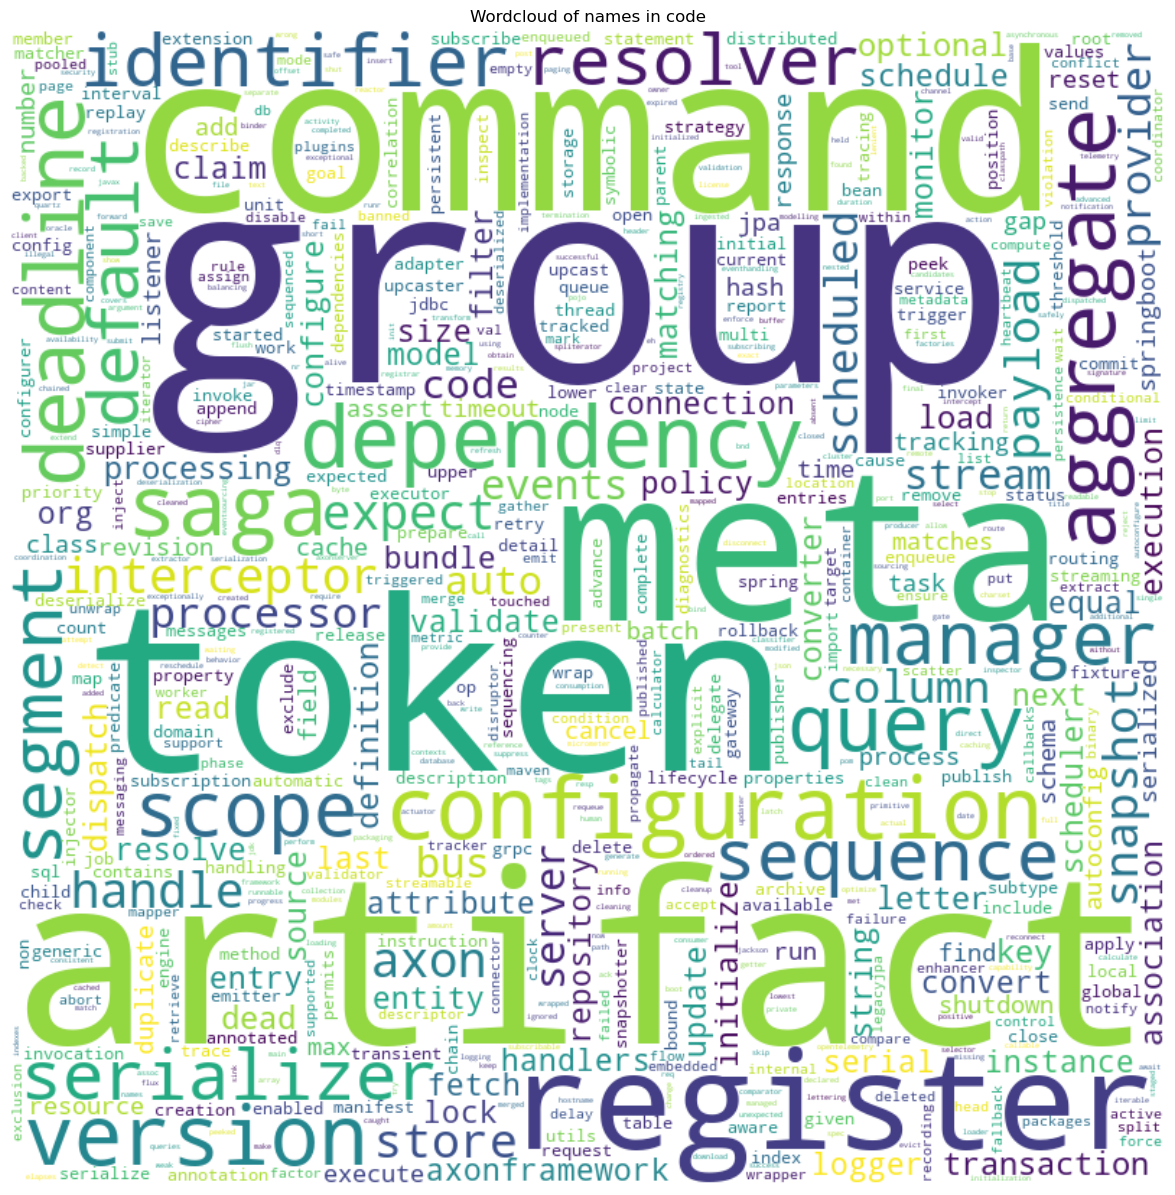

In [12]:
plot_word_cloud_from_text(words=words, title='Wordcloud of names in code')

## WordCloud of git authors

In [13]:
# Query data from graph database
git_author_words_with_frequency = query_cypher_to_data_frame("../cypher/Overview/Words_for_git_author_Wordcloud_with_frequency.cypher")
git_author_words_with_frequency.head(10)

,word,frequency
0,Steven van Beelen,1


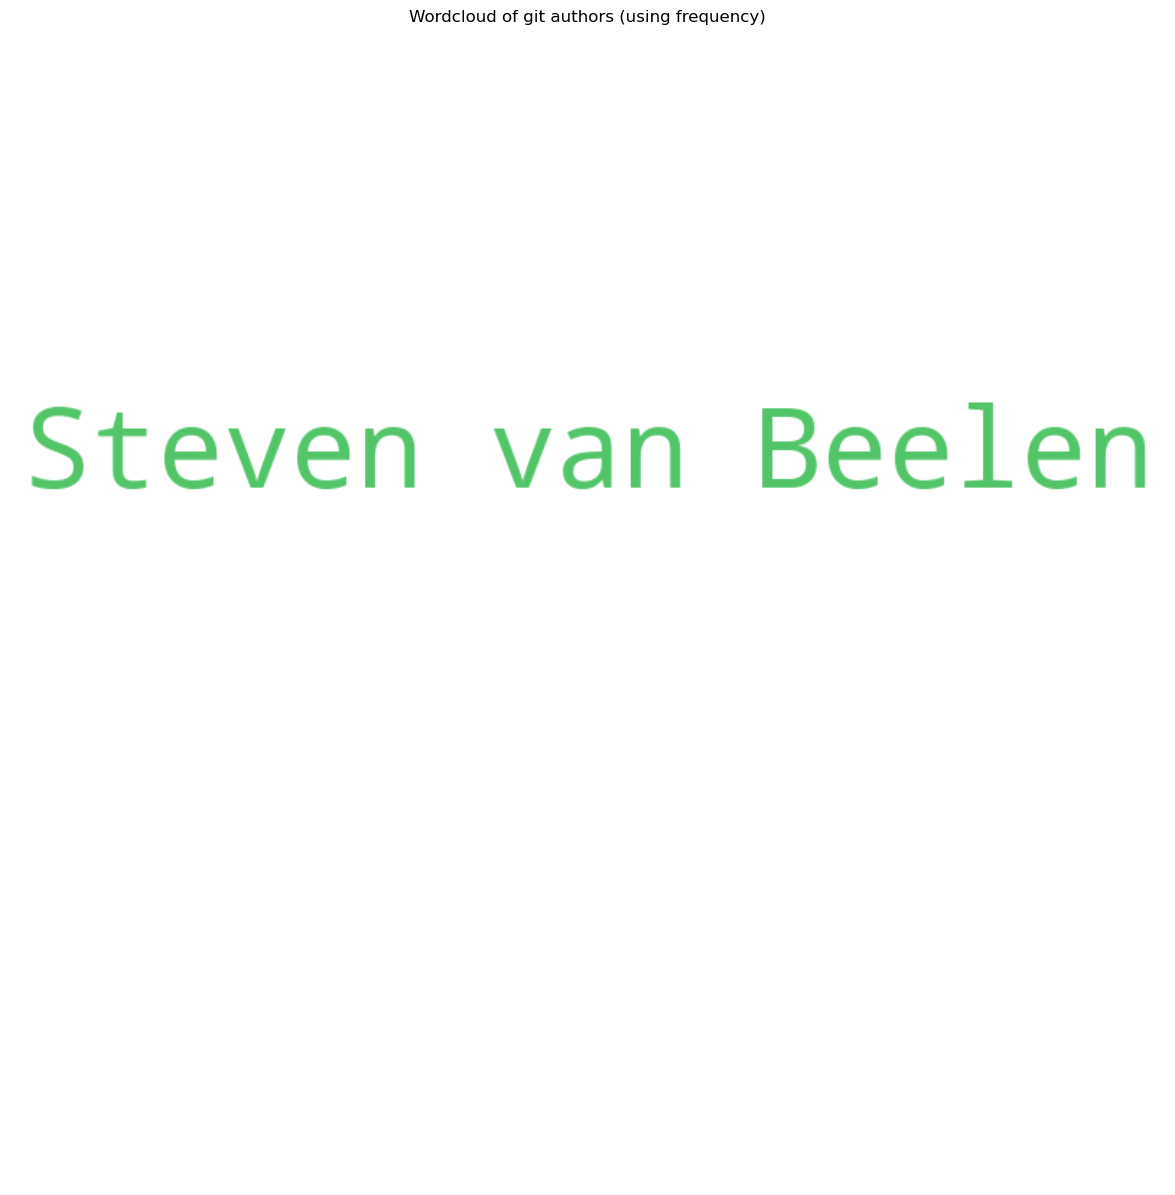

In [14]:
plot_word_cloud_with_frequency(git_author_words_with_frequency, 'Wordcloud of git authors (using frequency)')